In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/survey_results_public.csv')  # Use ../ because you're inside 'notebooks'

# Show first few rows
df.head()


,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [3]:
# 1. Check the shape of the dataset (rows, columns)
print("Dataset shape:", df.shape)

# 2. Check for missing values in key columns
print("Missing values in key columns:")
print(df[['Employment', 'EdLevel', 'YearsCode', 'ConvertedCompYearly']].isnull().sum())

# 3. Quick stats summary for numeric columns
print(df.describe())

# 4. Look at unique job titles and locations
print("Unique Employment types:", df['Employment'].unique())
print("Unique education levels:", df['EdLevel'].unique())
print("Example years of experience values:", df['YearsCode'].unique()[:10])

# 5. Filter to only full-time employees with known salaries
df_clean = df[
    (df['Employment'] == 'Employed full-time') & 
    (df['ConvertedCompYearly'].notnull()) & 
    (df['YearsCode'].notnull()) & 
    (df['EdLevel'].notnull())
]

print("Filtered dataset shape:", df_clean.shape) #all data points that are clean


Dataset shape: (73268, 79)
Missing values in key columns:
Employment              1559
EdLevel                 1697
YearsCode               1937
ConvertedCompYearly    35197
dtype: int64
         ResponseId     CompTotal  VCHostingPersonal use  \
count  73268.000000  3.842200e+04                    0.0   
mean   36634.500000  2.342434e+52                    NaN   
std    21150.794099  4.591478e+54                    NaN   
min        1.000000  0.000000e+00                    NaN   
25%    18317.750000  3.000000e+04                    NaN   
50%    36634.500000  7.750000e+04                    NaN   
75%    54951.250000  1.540000e+05                    NaN   
max    73268.000000  9.000000e+56                    NaN   

       VCHostingProfessional use       WorkExp  ConvertedCompYearly  
count                        0.0  36769.000000         3.807100e+04  
mean                         NaN     10.242378         1.707613e+05  
std                          NaN      8.706850         7.81413

In [4]:
print(df_clean['YearsCode'].unique())


[]


In [5]:
df_clean = df[
    (df['Employment'] == 'Employed full-time') & 
    (df['ConvertedCompYearly'].notnull()) & 
    (df['YearsCode'].notnull()) & 
    (df['EdLevel'].notnull())
]


In [6]:
print("Filtered dataset shape:", df_clean.shape)


Filtered dataset shape: (0, 79)


In [7]:
print(df['YearsCode'].unique())


[nan '14' '20' '8' '15' '3' '1' '6' '37' '5' '12' '22' '11' '4' '7' '13'
 '36' '2' '25' '10' '40' '16' '27' '24' '19' '9' '17' '18' '26'
 'More than 50 years' '29' '30' '32' 'Less than 1 year' '48' '45' '38'
 '39' '28' '23' '43' '21' '41' '35' '50' '33' '31' '34' '46' '44' '42'
 '47' '49']


In [8]:
def convert_years_code(x):
    if pd.isnull(x):
        return None
    if x == 'Less than 1 year':
        return 0.5
    if x == 'More than 50 years':
        return 51
    return float(x)


In [9]:
df_clean = df_clean.copy()
df_clean['YearsCode'] = df_clean['YearsCode'].apply(convert_years_code)


In [10]:
print(df_clean['YearsCode'].head())
print(df_clean['YearsCode'].dtype)  # Should be float

Series([], Name: YearsCode, dtype: object)
object


In [11]:
print(df_clean.shape)


(0, 79)


In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/survey_results_public.csv')


In [14]:
df_clean = df[
    (df['Employment'] == 'Employed full-time') &
    (df['ConvertedCompYearly'].notnull()) &
    (df['EdLevel'].notnull())
].copy()


In [15]:
def convert_years_code(x):
    if pd.isnull(x):
        return None
    if x == 'Less than 1 year':
        return 0.5
    if x == 'More than 50 years':
        return 51
    return float(x)


In [16]:
df_clean['YearsCode'] = df_clean['YearsCode'].apply(convert_years_code)


In [17]:
print(df_clean['YearsCode'].head())
print(df_clean['YearsCode'].dtype)
print(df_clean.shape)  # Confirm rows exist


Series([], Name: YearsCode, dtype: object)
object
(0, 79)


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/survey_results_public.csv')

# Check columns
print(df.columns)


Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [3]:
print(df['Employment'].unique())
print(df['ConvertedCompYearly'].dtype)
print(df['EdLevel'].unique())
print(df['YearsCode'].unique())


[nan 'Employed, full-time' 'Student, full-time' 'Student, part-time'
 'Not employed, but looking for work'
 'Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Employed, part-time' 'Student, part-time;Employed, part-time'
 'Not employed, and not looking for work'
 'Student, full-time;Employed, part-time'
 'Employed, full-time;Student, part-time'
 'Employed, full-time;Student, full-time'
 'Student, part-time;Independent contractor, freelancer, or self-employed'
 'Retired' 'Student, full-time;Not employed, but looking for work'
 'I prefer not to say'
 'Student, full-time;Independent contractor, freelancer, or self-employed'
 'Student, full-time;Not employed, and not looking for work'
 'Not employed, but looking for work;Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, part-time;Independent contractor, freelancer, or self-employed'
 'Independent contractor, freelancer, or s

In [4]:
df_clean = df[df['Employment'] == 'Employed full-time'].copy()
print(df_clean.shape)  # Check how many rows now


(0, 79)


In [5]:
def convert_years_code(x):
    if pd.isnull(x):
        return None
    if x == 'Less than 1 year':
        return 0.5
    if x == 'More than 50 years':
        return 51
    try:
        return float(x)
    except:
        return None


In [6]:
df_clean['YearsCode'] = df_clean['YearsCode'].apply(convert_years_code)


In [7]:
print(df_clean['YearsCode'].head())
print(df_clean['YearsCode'].dtype)


Series([], Name: YearsCode, dtype: object)
object


In [9]:
import pandas as pd

# Load data
df = pd.read_csv('../data/survey_results_public.csv')

# Check key columns
print("Employment types:", df['Employment'].unique())
print("YearsCode values:", df['YearsCode'].unique())
print("ConvertedCompYearly nulls:", df['ConvertedCompYearly'].isnull().sum())
print("Total rows:", df.shape)


Employment types: [nan 'Employed, full-time' 'Student, full-time' 'Student, part-time'
 'Not employed, but looking for work'
 'Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Employed, part-time' 'Student, part-time;Employed, part-time'
 'Not employed, and not looking for work'
 'Student, full-time;Employed, part-time'
 'Employed, full-time;Student, part-time'
 'Employed, full-time;Student, full-time'
 'Student, part-time;Independent contractor, freelancer, or self-employed'
 'Retired' 'Student, full-time;Not employed, but looking for work'
 'I prefer not to say'
 'Student, full-time;Independent contractor, freelancer, or self-employed'
 'Student, full-time;Not employed, and not looking for work'
 'Not employed, but looking for work;Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, part-time;Independent contractor, freelancer, or self-employed'
 'Independent contractor

In [ ]:
print("Filtered dataset shape:", df_clean.shape)


Filtered dataset shape: (0, 79)


In [10]:
def convert_years_code(x):
    if pd.isnull(x):
        return None
    if x == 'Less than 1 year':
        return 0.5
    if x == 'More than 50 years':
        return 51
    try:
        return float(x)
    except:
        return None

# Apply it directly to the full df (not filtered yet)
df['YearsCodeClean'] = df['YearsCode'].apply(convert_years_code)

# Check result
print(df[['YearsCode', 'YearsCodeClean']].head(10))
print("YearsCodeClean dtype:", df['YearsCodeClean'].dtype)


  YearsCode  YearsCodeClean
0       NaN             NaN
1       NaN             NaN
2        14            14.0
3        20            20.0
4         8             8.0
5        15            15.0
6         3             3.0
7         1             1.0
8         6             6.0
9        37            37.0
YearsCodeClean dtype: float64


In [11]:
df_clean = df[df['Employment'] == 'Employed full-time'].copy()

# Drop rows with missing salary or experience
df_clean = df_clean[
    df_clean['ConvertedCompYearly'].notnull() &
    df_clean['YearsCodeClean'].notnull()
]

print("Filtered shape:", df_clean.shape)


Filtered shape: (0, 80)


In [12]:
print("Total rows in dataset:", df.shape)

# How many full-time employed?
print("Employed full-time:", df[df['Employment'] == 'Employed full-time'].shape[0])

# How many have non-null salaries?
print("Non-null salaries:", df['ConvertedCompYearly'].notnull().sum())

# How many have valid experience?
print("Non-null YearsCodeClean:", df['YearsCodeClean'].notnull().sum())

# How many satisfy all 3?
filtered_df = df[
    (df['Employment'] == 'Employed full-time') &
    (df['ConvertedCompYearly'].notnull()) &
    (df['YearsCodeClean'].notnull())
]
print("All 3 filters passed:", filtered_df.shape[0])


Total rows in dataset: (73268, 80)
Employed full-time: 0
Non-null salaries: 38071
Non-null YearsCodeClean: 71331
All 3 filters passed: 0


In [13]:
print(df['Employment'].unique())


[nan 'Employed, full-time' 'Student, full-time' 'Student, part-time'
 'Not employed, but looking for work'
 'Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Employed, part-time' 'Student, part-time;Employed, part-time'
 'Not employed, and not looking for work'
 'Student, full-time;Employed, part-time'
 'Employed, full-time;Student, part-time'
 'Employed, full-time;Student, full-time'
 'Student, part-time;Independent contractor, freelancer, or self-employed'
 'Retired' 'Student, full-time;Not employed, but looking for work'
 'I prefer not to say'
 'Student, full-time;Independent contractor, freelancer, or self-employed'
 'Student, full-time;Not employed, and not looking for work'
 'Not employed, but looking for work;Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, part-time;Independent contractor, freelancer, or self-employed'
 'Independent contractor, freelancer, or s

In [14]:
df_clean = df[
    df['Employment'].str.contains('Employed, full-time', na=False)
].copy()


In [15]:
df_clean = df_clean[
    df_clean['ConvertedCompYearly'].notnull() &
    df_clean['YearsCodeClean'].notnull()
]


In [16]:
print("Final cleaned dataset shape:", df_clean.shape)


Final cleaned dataset shape: (34354, 80)


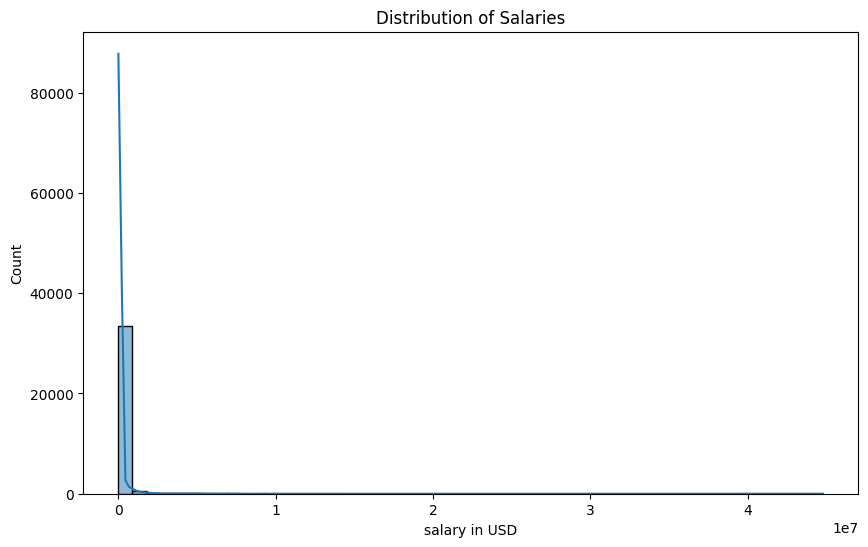

In [19]:
import matplotlib.pyplot as plt #Used for making histograms and plots
import seaborn as sns # makes plots prettier and easier to interpret.
plt.figure(figsize = (10,6)) #blank canvas of 10 by 6   
sns.histplot(df_clean["ConvertedCompYearly"] , bins = 50 , kde = True)
plt.title("Distribution of Salaries")
plt.xlabel("salary in USD")
plt.ylabel("Count")
plt.show()

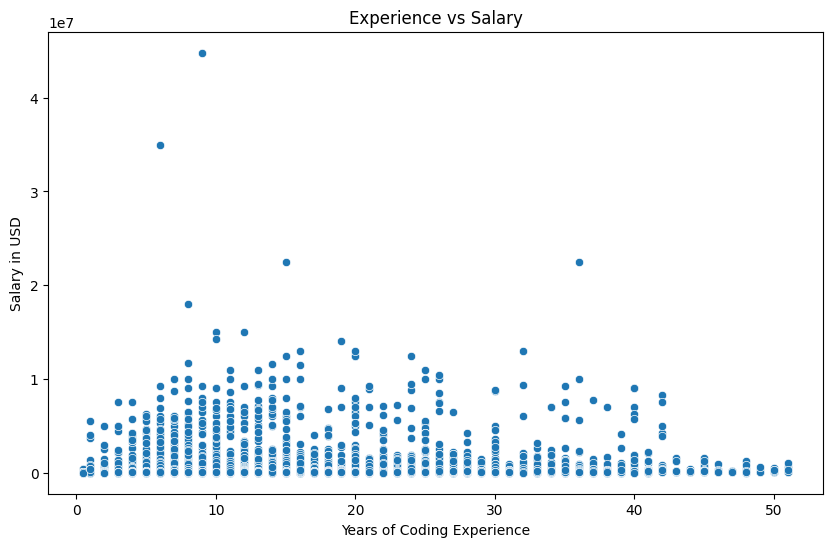

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df_clean , x = "YearsCodeClean" , y = "ConvertedCompYearly")
plt.title("Experience vs Salary")
plt.xlabel("Years of Coding Experience")
plt.ylabel("Salary in USD")
plt.show()

In [ ]:
!pip install seaborn


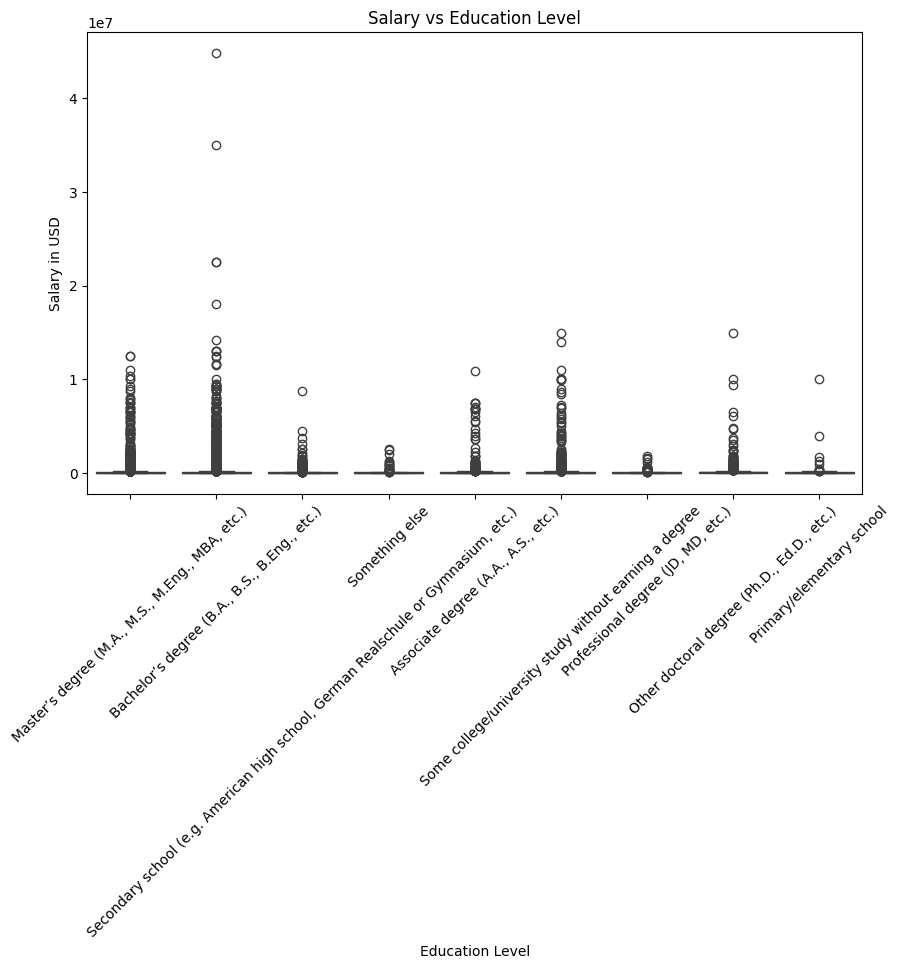

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df_clean , x = "EdLevel" , y = "ConvertedCompYearly")
plt.xticks(rotation = 45)
plt.title("Salary vs Education Level")
plt.xlabel("Education Level")
plt.ylabel("Salary in USD")
plt.show()

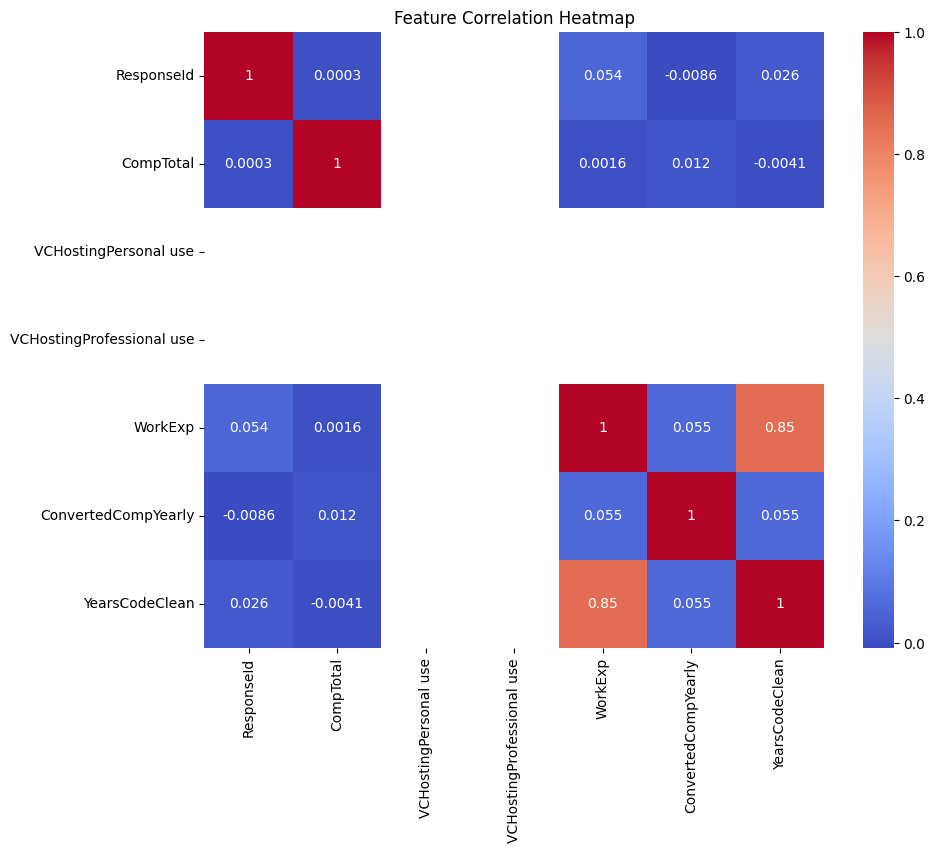

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [23]:
features = df_clean[[
    'Country',
    'YearsCodeClean',
    'EdLevel',
    'ConvertedCompYearly'
]].dropna()


In [24]:
features = features.rename(columns={'ConvertedCompYearly': 'Salary'})


In [25]:
features.head()


,Country,YearsCodeClean,EdLevel,Salary
2,United Kingdom of Great Britain and Northern I...,14.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",40205.0
3,Israel,20.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",215232.0
8,Netherlands,6.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",49056.0
10,United Kingdom of Great Britain and Northern I...,5.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",60307.0
11,United States of America,12.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",194400.0


In [26]:
def simplifyEducation(edlevel):
    if "Bachelor's degree" in edlevel:
        return "Bachelor's degree"
    elif "Master's degree" in edlevel:
        return "Master's degree"
    elif "Professional degree" in edlevel or "Other doctoral" in edlevel:
        return "Postgraduate degree"
    else:
        return "Less than a Bachelor's"

features['EdLevel'] = features['EdLevel'].apply(simplifyEducation)

In [27]:
features['EdLevel'].value_counts()


EdLevel
Less than a Bachelor's    32575
Postgraduate degree        1767
Name: count, dtype: int64

In [28]:
country_counts = features['Country'].value_counts()

# Only keep countries with at least 400 entries
countries_to_keep = country_counts[country_counts >= 400].index

features['Country'] = features['Country'].apply(lambda x: x if x in countries_to_keep else 'Other')


In [29]:
features['Country'].value_counts()

Country
Other                                                   9472
United States of America                                8301
Germany                                                 2545
United Kingdom of Great Britain and Northern Ireland    2439
India                                                   2057
Canada                                                  1365
France                                                  1204
Brazil                                                  1162
Spain                                                    921
Netherlands                                              750
Poland                                                   750
Australia                                                742
Italy                                                    711
Sweden                                                   596
Russian Federation                                       485
Switzerland                                              438
Turkey          

In [31]:
## Next step is Encoding Categorical Variables


In [32]:
from sklearn.preprocessing import LabelEncoder #convert text (like country names) into numbers, which is what machine learning needs.

le_country = LabelEncoder() #creating a label encoder for the Country column.
le_edlevel = LabelEncoder() #making another encoder, this time for the EdLevel column (Education Level).

features['Country'] = le_country.fit_transform(features['Country']) #It replaces those text values with numbers and learns all the unique values
features['EdLevel'] = le_edlevel.fit_transform(features['EdLevel']) #Same as above now just with Education

print(features[['Country', 'EdLevel']].head()) #prints the first 5 rows of just the Country and EdLevel columns.


    Country  EdLevel
2        15        0
3         8        0
8         7        0
10       15        0
11       16        0


In [33]:
print(le_country.classes_)
print(le_edlevel.classes_)


['Australia' 'Brazil' 'Canada' 'France' 'Germany' 'India' 'Italy'
 'Netherlands' 'Other' 'Poland' 'Russian Federation' 'Spain' 'Sweden'
 'Switzerland' 'Turkey'
 'United Kingdom of Great Britain and Northern Ireland'
 'United States of America']
["Less than a Bachelor's" 'Postgraduate degree']


In [34]:
#Split the Data & Train the Model

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Step 1: Define input features (X) and target (y)
X = features.drop("ConvertedCompYearly", axis=1)
y = features["ConvertedCompYearly"]

# Step 2: Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict on test data
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: ${mae:,.2f}")

KeyError: "['ConvertedCompYearly'] not found in axis"

In [36]:
X = features  # input features
y = df_clean["ConvertedCompYearly"]  # target (salary)


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


ValueError: Found input variables with inconsistent numbers of samples: [34342, 34354]

In [38]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (34342, 4)
y shape: (34354,)


In [39]:
# Step 1: Build features and target together from df_clean to ensure perfect alignment
features = df_clean[["Country", "EdLevel", "YearsCodeClean"]].copy()
target = df_clean["ConvertedCompYearly"].copy()

# Step 2: Drop rows with any missing values in features or target
combined = pd.concat([features, target], axis=1).dropna()

# Step 3: Separate again after cleaning
features = combined[["Country", "EdLevel", "YearsCodeClean"]]
target = combined["ConvertedCompYearly"]

# Step 4: Check shape
print("Features shape:", features.shape)
print("Target shape:", target.shape)


Features shape: (34342, 3)
Target shape: (34342,)


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Step 1: Initialize the model
model = LinearRegression()

# Step 2: Train the model on training data
model.fit(X_train, y_train)

# Step 3: Predict on test data
y_pred = model.predict(X_test)

# Step 4: Evaluate performance using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


ValueError: could not convert string to float: 'United States of America'

In [42]:
print(features.dtypes)


Country            object
EdLevel            object
YearsCodeClean    float64
dtype: object


In [43]:
from sklearn.preprocessing import LabelEncoder

# Create encoders
le_country = LabelEncoder()
le_edlevel = LabelEncoder()

# Apply encoders
features['Country'] = le_country.fit_transform(features['Country'])
features['EdLevel'] = le_edlevel.fit_transform(features['EdLevel'])

# Confirm again
print(features.dtypes)


Country             int64
EdLevel             int64
YearsCodeClean    float64
dtype: object


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3580\45284739.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Country'] = le_country.fit_transform(features['Country'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3580\45284739.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['EdLevel'] = le_edlevel.fit_transform(features['EdLevel'])


In [44]:
features = df_clean[['Country', 'EdLevel', 'YearsCodeClean']].copy()

# Then apply encoders
features['Country'] = le_country.fit_transform(features['Country'])
features['EdLevel'] = le_edlevel.fit_transform(features['EdLevel'])


In [45]:
X = features
y = df_clean['ConvertedCompYearly']


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 179491.6962975988


In [48]:
#Visualize Predictions vs Actual

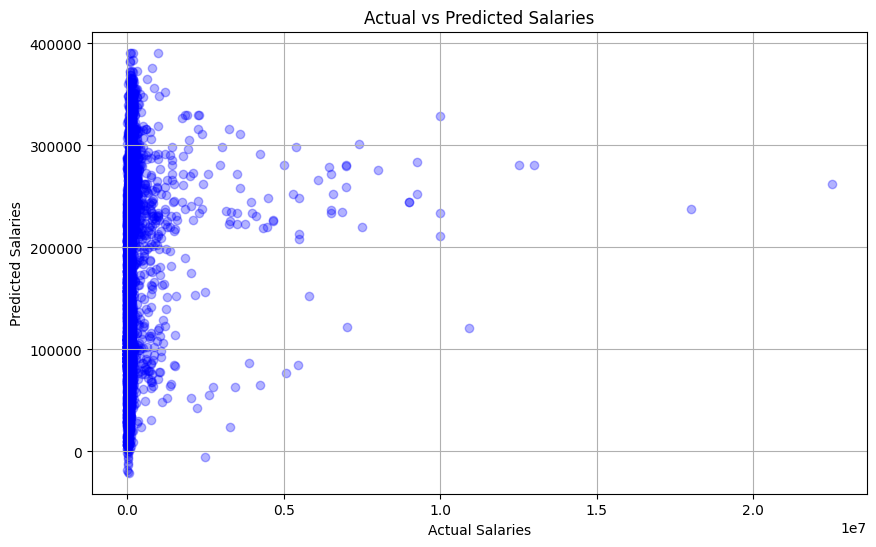

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue')
plt.xlabel("Actual Salaries")
plt.ylabel("Predicted Salaries")
plt.title("Actual vs Predicted Salaries")
plt.grid(True)
plt.show()

In [50]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
rf = RandomForestRegressor() #Creates an instance of the Random Forest Regressor.

In [52]:
rf.fit(X_train, y_train)


RandomForestRegressor()

In [53]:
y_pred_rf = rf.predict(X_test)


In [54]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("Random Forest MAE:", mae_rf)


Random Forest MAE: 185925.46176091838


In [56]:
print("Linear Regression MAE:", mae)
print("Random Forest MAE:", mae_rf)


Linear Regression MAE: 179491.6962975988
Random Forest MAE: 185925.46176091838


In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

print("Decision Tree MAE:", mae_dt)


Decision Tree MAE: 187383.07649149926


In [58]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print("Gradient Boosting MAE:", mae_gb)

Gradient Boosting MAE: 175960.07203036832


In [59]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/124.9 MB 7.2 MB/s eta 0:00:18
   - -------------------------------------- 3.4/124.9 MB 10.1 MB/s eta 0:00:13
   - -------------------------------------- 5.2/124.9 MB 9.4 MB/s eta 0:00:13
   -- ------------------------------------- 7.3/124.9 MB 9.9 MB/s eta 0:00:12
   --- ------------------------------------ 9.7/124.9 MB 9.9 MB/s eta 0:00:12
   --- ------------------------------------ 11.5/124.9 MB 9.8 MB/s eta 0:00:12
   ---- ----------------------------------- 13.6/124.9 MB 9.8 MB/s eta 0:00:12
   ----- ---------------------------------- 16.0/124.9 MB 10.0 MB/s eta 0:00:11
   ----- ---------------------------------- 18.1/124.9 MB 10.0 MB/s eta 0:00:11
   ------ --------------------------------- 20.2/124.9 MB 10.0 MB/s eta 0:00:11
   ------- -------------------------------- 22.5/124.9 MB 10.2 MB/s eta 0:00:11
   ------- -------------------------------- 24.4/124.9 MB 10

In [60]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("XGBoost MAE:", mae_xgb)

XGBoost MAE: 182686.3489128849


In [61]:
print("Linear Regression MAE:", mae)
print("Random Forest MAE:", mae_rf)
print("Decision Tree MAE:", mae_dt)
print("Gradient Boosting MAE:", mae_gb)
print("XGBoost MAE:", mae_xgb)

Linear Regression MAE: 179491.6962975988
Random Forest MAE: 185925.46176091838
Decision Tree MAE: 187383.07649149926
Gradient Boosting MAE: 175960.07203036832
XGBoost MAE: 182686.3489128849


In [62]:
import joblib
joblib.dump(gb, 'salary_predictor_model.pkl')


['salary_predictor_model.pkl']

In [63]:
model = joblib.load('salary_predictor_model.pkl')

In [64]:
import joblib

# Load the model
model = joblib.load('salary_predictor_model.pkl')

# Predict on a new example (make sure the input shape matches training features)
new_sample = [[21, 3, 5]]  # [Country, EdLevel, YearsCodeClean] example
predicted_salary = model.predict(new_sample)

print("Predicted Salary:", predicted_salary[0])


Predicted Salary: 30344.705509761818


c:\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [65]:
def predict_salary(country, edlevel, years_code):
    import pandas as pd
    # Prepare data as DataFrame with the right column names
    input_df = pd.DataFrame([[country, edlevel, years_code]], columns=['Country', 'EdLevel', 'YearsCodeClean'])
    
    # Predict using your loaded model
    salary_pred = model.predict(input_df)
    
    return salary_pred[0]

In [66]:
print(predict_salary(21, 3, 5))  # example numeric encoded inputs

30344.705509761818


In [67]:
import joblib

joblib.dump(le_country, 'le_country.pkl')
joblib.dump(le_edlevel, 'le_edlevel.pkl')


['le_edlevel.pkl']

In [68]:
print(le_edlevel.classes_)

['Associate degree (A.A., A.S., etc.)'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Other doctoral degree (Ph.D., Ed.D., etc.)' 'Primary/elementary school'
 'Professional degree (JD, MD, etc.)'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Some college/university study without earning a degree' 'Something else'
 nan]


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (update filename if needed)
df = pd.read_csv('..\data\survey_results_public.csv')  # or use the path to your CSV or Excel

# Step 1: Basic info
print("Data shape:", df.shape)
print(df.info())
print(df.isnull().sum())  # missing values count per column

# Step 2: Salary distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Salary'], bins=50, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.show()

# Step 3: Boxplot to detect outliers
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Salary'])
plt.title('Salary Boxplot')
plt.show()

# Step 4: Salary by Country (top 10 countries with most data)
top_countries = df['Country'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(x='Country', y='Salary', data=df[df['Country'].isin(top_countries)])
plt.xticks(rotation=45)
plt.title('Salary Distribution by Top 10 Countries')
plt.show()

# Step 5: Salary by Education Level
plt.figure(figsize=(12,6))
sns.boxplot(x='EdLevel', y='Salary', data=df)
plt.xticks(rotation=45)
plt.title('Salary Distribution by Education Level')
plt.show()


Data shape: (73268, 79)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize 

KeyError: 'Salary'

<Figure size 1000x500 with 0 Axes>

In [70]:
import pandas as pd

df = pd.read_csv('..\data\survey_results_public.csv')
print(df.shape)
print(df.head())


(73268, 79)
   ResponseId                                         MainBranch  \
0           1                                      None of these   
1           2                     I am a developer by profession   
2           3  I am not primarily a developer, but I write co...   
3           4                     I am a developer by profession   
4           5                     I am a developer by profession   

            Employment                            RemoteWork  \
0                  NaN                                   NaN   
1  Employed, full-time                          Fully remote   
2  Employed, full-time  Hybrid (some remote, some in-person)   
3  Employed, full-time                          Fully remote   
4  Employed, full-time  Hybrid (some remote, some in-person)   

                           CodingActivities  \
0                                       NaN   
1  Hobby;Contribute to open-source projects   
2                                     Hobby   
3     

In [71]:
print(df.isnull().sum())


ResponseId                 0
MainBranch                 0
Employment              1559
RemoteWork             14310
CodingActivities       14369
                       ...  
TrueFalse_2            37553
TrueFalse_3            37519
SurveyLength            2824
SurveyEase              2760
ConvertedCompYearly    35197
Length: 79, dtype: int64


In [72]:
# Drop rows where salary or years of experience is missing
df = df.dropna(subset=['ConvertedCompYearly', 'YearsCode'])

# Optional: fill missing values in other columns if needed
# df['SomeColumn'].fillna('Unknown', inplace=True)


In [73]:
def clean_years_code(x):
    if pd.isnull(x):
        return None
    if x == 'Less than 1 year':
        return 0.5
    if x == 'More than 50 years':
        return 51
    try:
        return float(x)
    except:
        return None

df['YearsCodeClean'] = df['YearsCode'].apply(clean_years_code)
df = df.dropna(subset=['YearsCodeClean'])


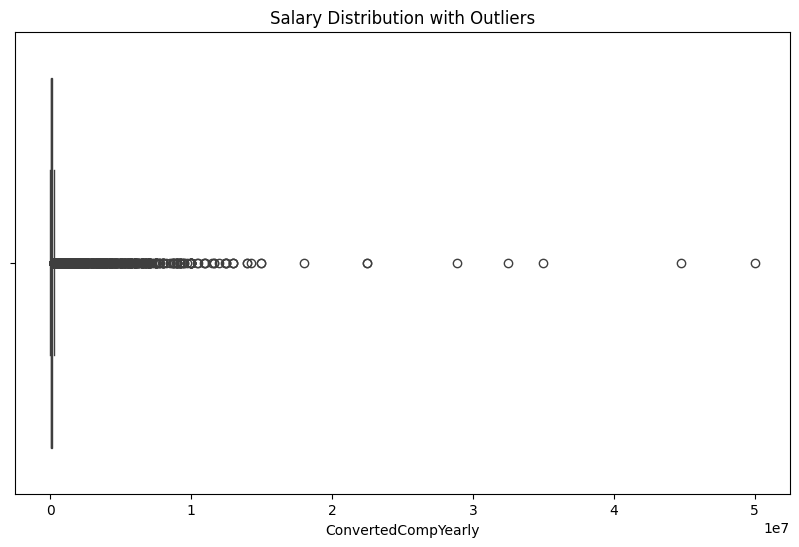

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x=df['ConvertedCompYearly'])
plt.title("Salary Distribution with Outliers")
plt.show()

In [75]:
print(df['ConvertedCompYearly'].describe())
print(df['YearsCodeClean'].describe())

count    3.800100e+04
mean     1.708477e+05
std      7.819321e+05
min      1.000000e+00
25%      3.583200e+04
50%      6.800000e+04
75%      1.200000e+05
max      5.000000e+07
Name: ConvertedCompYearly, dtype: float64
count    38001.000000
mean        14.413647
std          9.573948
min          0.500000
25%          7.000000
50%         12.000000
75%         20.000000
max         51.000000
Name: YearsCodeClean, dtype: float64


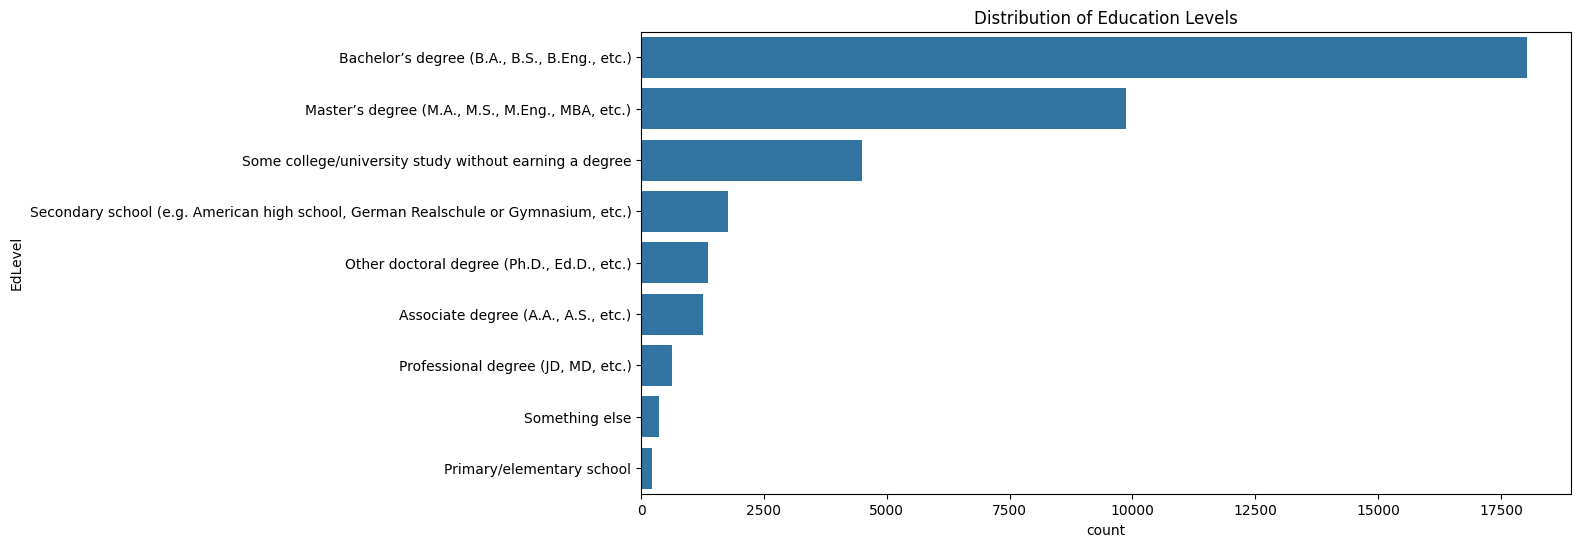

In [76]:
plt.figure(figsize=(12,6))
sns.countplot(y='EdLevel', data=df, order=df['EdLevel'].value_counts().index)
plt.title("Distribution of Education Levels")
plt.show()

In [77]:
print(le_edlevel.classes_)

['Associate degree (A.A., A.S., etc.)'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Other doctoral degree (Ph.D., Ed.D., etc.)' 'Primary/elementary school'
 'Professional degree (JD, MD, etc.)'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Some college/university study without earning a degree' 'Something else'
 nan]


In [78]:
import pandas as pd
df = pd.read_csv("..\data\survey_results_public.csv")
print(df.columns)
print(df["Employment"].unique())


Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [79]:
print("Employment unique values:")
print(df['Employment'].dropna().unique())

print("\nRemoteWork unique values:")
print(df['RemoteWork'].dropna().unique())

print("\nDevType unique values:")
print(df['DevType'].dropna().unique())


Employment unique values:
['Employed, full-time' 'Student, full-time' 'Student, part-time'
 'Not employed, but looking for work'
 'Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Employed, part-time' 'Student, part-time;Employed, part-time'
 'Not employed, and not looking for work'
 'Student, full-time;Employed, part-time'
 'Employed, full-time;Student, part-time'
 'Employed, full-time;Student, full-time'
 'Student, part-time;Independent contractor, freelancer, or self-employed'
 'Retired' 'Student, full-time;Not employed, but looking for work'
 'I prefer not to say'
 'Student, full-time;Independent contractor, freelancer, or self-employed'
 'Student, full-time;Not employed, and not looking for work'
 'Not employed, but looking for work;Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, part-time;Independent contractor, freelancer, or self-employed'
 'Independent contra

In [80]:
def simplify_employment(emp_str):
    if pd.isna(emp_str):
        return "Unknown"
    if "Employed, full-time" in emp_str:
        return "Employed, full-time"
    elif "Employed, part-time" in emp_str:
        return "Employed, part-time"
    elif "Independent contractor, freelancer, or self-employed" in emp_str:
        return "Freelance"
    elif "Student" in emp_str:
        return "Student"
    elif "Not employed, but looking for work" in emp_str:
        return "Unemployed"
    elif "Retired" in emp_str:
        return "Retired"
    else:
        return "Other"

df["EmploymentSimple"] = df["Employment"].apply(simplify_employment)


In [ ]:
df = df[df["ConvertedCompYearly"].notnull()] #removes rows where salary data (ConvertedCompYearly) is missing 
df = df[df["EmploymentSimple"] != "Unknown"] #removes rows where the employment type was marked as "Unknown"

In [ ]:
from sklearn.preprocessing import LabelEncoder #Used for converting text labels into numbers for the model to understand.

# Initialize the encoder
emp_encoder = LabelEncoder() #Creates an instance of LabelEncoder

# Fit and transform EmploymentSimple
df['EmploymentEncoded'] = emp_encoder.fit_transform(df['EmploymentSimple'])


In [83]:
import pickle

# Save the encoder to a file
with open('emp_encoder.pkl', 'wb') as f:
    pickle.dump(emp_encoder, f)


In [84]:
df[['EmploymentSimple', 'EmploymentEncoded']].head()

,EmploymentSimple,EmploymentEncoded
2,"Employed, full-time",0
3,"Employed, full-time",0
8,"Employed, full-time",0
10,"Employed, full-time",0
11,"Employed, full-time",0


In [88]:
import pickle

# Load the country encoder
with open('le_country.pkl', 'rb') as f:
    country_encoder = pickle.load(f)

# Remove rows with missing country and transform
df = df[df['Country'].notnull()]
df['CountryEncoded'] = country_encoder.transform(df['Country'])


UnpicklingError: STACK_GLOBAL requires str

In [89]:
from sklearn.preprocessing import LabelEncoder

# Create encoders
le_country = LabelEncoder()
le_edlevel = LabelEncoder()

# Fit them to your data
df = df[df['Country'].notnull()]
df = df[df['EdLevel'].notnull()]

df['CountryEncoded'] = le_country.fit_transform(df['Country'])
df['EducationEncoded'] = le_edlevel.fit_transform(df['EdLevel'])


In [90]:
X = df[['CountryEncoded', 'EducationEncoded', 'YearsCodePro', 'EmploymentEncoded']]
y = df['ConvertedCompYearly']


In [91]:
X['YearsCodePro'] = pd.to_numeric(X['YearsCodePro'], errors='coerce')
X = X.dropna()  # drop rows with NaNs that might have been introduced
y = y[X.index]  # align target with the filtered X


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3580\390421193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['YearsCodePro'] = pd.to_numeric(X['YearsCodePro'], errors='coerce')


In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [93]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [94]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 863998357210.75
R^2 Score: -0.03


In [95]:
import pickle

with open("salary_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [96]:
with open("le_country.pkl", "wb") as f:
    pickle.dump(le_country, f)

with open("le_edlevel.pkl", "wb") as f:
    pickle.dump(le_edlevel, f)

with open("le_employment.pkl", "wb") as f:
    pickle.dump(le_employment, f)

with open("le_role.pkl", "wb") as f:
    pickle.dump(le_role, f)


NameError: name 'le_employment' is not defined

In [97]:
from sklearn.preprocessing import LabelEncoder

# Create label encoders
le_employment = LabelEncoder()
le_role = LabelEncoder()

# Fit them to your simplified columns
df = df[df['EmploymentSimple'].notnull()]
df = df[df['RoleSimple'].notnull()]

df['EmploymentEncoded'] = le_employment.fit_transform(df['EmploymentSimple'])
df['RoleEncoded'] = le_role.fit_transform(df['RoleSimple'])


KeyError: 'RoleSimple'

In [98]:
# Example: Extract first role from 'DevType' (semicolon-separated list)
df['RoleSimple'] = df['DevType'].apply(lambda x: x.split(';')[0] if pd.notnull(x) else 'Unknown')

In [99]:
df = df[df['RoleSimple'].notnull()]
df['RoleEncoded'] = le_role.fit_transform(df['RoleSimple'])


In [100]:
# Convert YearsCodePro to numeric (handles 'Less than 1 year', 'More than 50 years', etc.)
def clean_experience(x):
    if x == "More than 50 years":
        return 50
    elif x == "Less than 1 year":
        return 0.5
    try:
        return float(x)
    except:
        return None

df["YearsCodePro"] = df["YearsCodePro"].apply(clean_experience)
df = df[df["YearsCodePro"].notnull()]

In [101]:
# Features to use
X = df[["CountryEncoded", "EducationEncoded", "EmploymentEncoded", "RoleEncoded", "YearsCodePro"]]

# Target variable
y = df["ConvertedCompYearly"]


In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [104]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 448977624134.32
R² Score: -0.25


In [105]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("le_country.pkl", "wb") as f:
    pickle.dump(le_country, f)

with open("le_edlevel.pkl", "wb") as f:
    pickle.dump(le_edlevel, f)

with open("le_employment.pkl", "wb") as f:
    pickle.dump(le_employment, f)

with open("le_role.pkl", "wb") as f:
    pickle.dump(le_role, f)


In [106]:
from sklearn.preprocessing import LabelEncoder
import joblib

le_country = LabelEncoder()
le_edlevel = LabelEncoder()
le_employment = LabelEncoder()
le_role = LabelEncoder()

# FIT the encoders
df = df[df['Country'].notnull()]
df = df[df['EdLevel'].notnull()]
df = df[df['EmploymentSimple'].notnull()]
df = df[df['RoleSimple'].notnull()]

le_country.fit(df['Country'])
le_edlevel.fit(df['EdLevel'])
le_employment.fit(df['EmploymentSimple'])
le_role.fit(df['RoleSimple'])

# SAVE the fitted encoders
joblib.dump(le_country, "le_country.pkl")
joblib.dump(le_edlevel, "le_edlevel.pkl")
joblib.dump(le_employment, "le_employment.pkl")
joblib.dump(le_role, "le_role.pkl")


['le_role.pkl']

In [109]:
import joblib

le_country = joblib.load("../app/le_country.pkl")
le_role = joblib.load("../app/le_role.pkl")

print("All countries seen by the encoder:", le_country.classes_)
print("All roles seen by the encoder:", le_role.classes_)


All countries seen by the encoder: ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Argentina'
 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria' 'Cambodia'
 'Cameroon' 'Canada' 'Cape Verde' 'Chile' 'China' 'Colombia'
 'Congo, Republic of the...' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' "Côte d'Ivoire" 'Democratic Republic of the Congo'
 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'Hong Kong (S.A.R.)'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran, Islamic Republic of...'
 'Iraq' 'Ireland' 'Isle of Man' 'Israel' 'Italy' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan'
 "Lao People's Democratic Republic" 'Latvia' 'Lebanon'
 'Libyan Arab Jamahiriya' 'Li

In [111]:
import pandas as pd

# Load the CSV
df = pd.read_csv("../data/survey_results_public.csv")

# Display the first few rows
print(df.head())

# Show column names
print(df.columns)


   ResponseId                                         MainBranch  \
0           1                                      None of these   
1           2                     I am a developer by profession   
2           3  I am not primarily a developer, but I write co...   
3           4                     I am a developer by profession   
4           5                     I am a developer by profession   

            Employment                            RemoteWork  \
0                  NaN                                   NaN   
1  Employed, full-time                          Fully remote   
2  Employed, full-time  Hybrid (some remote, some in-person)   
3  Employed, full-time                          Fully remote   
4  Employed, full-time  Hybrid (some remote, some in-person)   

                           CodingActivities  \
0                                       NaN   
1  Hobby;Contribute to open-source projects   
2                                     Hobby   
3              I d

In [112]:
# Select relevant columns
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "DevType", "ConvertedCompYearly"]]

# Drop rows with missing values
df = df.dropna()

# Filter out unreasonable salaries
df = df[df["ConvertedCompYearly"] < 300000]  # Optional upper limit
df = df[df["ConvertedCompYearly"] > 1000]    # Optional lower limit

# Simplify EdLevel
def clean_education(x):
    if "Bachelor’s degree" in x:
        return "Bachelor’s degree"
    elif "Master’s degree" in x:
        return "Master’s degree"
    elif "Professional degree" in x or "Other doctoral" in x:
        return "Post grad"
    else:
        return "Less than a Bachelors"
df["EdLevel"] = df["EdLevel"].apply(clean_education)

# Clean YearsCodePro
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    elif x == 'Less than 1 year':
        return 0.5
    else:
        try:
            return float(x)
        except:
            return None
df["YearsCodePro"] = df["YearsCodePro"].apply(clean_experience)

# Drop NaNs again if any
df = df.dropna()


In [114]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Rename DevType to Role for clarity
df = df.rename(columns={"DevType": "Role"})

# Initialize encoders
le_country = LabelEncoder()
le_education = LabelEncoder()
le_employment = LabelEncoder()
le_role = LabelEncoder()

# Fit and transform
df["Country"] = le_country.fit_transform(df["Country"])
df["EdLevel"] = le_education.fit_transform(df["EdLevel"])
df["Employment"] = le_employment.fit_transform(df["Employment"])
df["Role"] = le_role.fit_transform(df["Role"])

# Save encoders to app/ directory
joblib.dump(le_country, "../app/le_country.pkl")
joblib.dump(le_education, "../app/le_edlevel.pkl")
joblib.dump(le_employment, "../app/le_employment.pkl")
joblib.dump(le_role, "../app/le_role.pkl")


['../app/le_role.pkl']

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Features and target
X = df[["Country", "EdLevel", "Employment", "Role"]]
y = df["ConvertedCompYearly"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


# Save model
joblib.dump(model, "../app/model.pkl")


R2 Score: 0.4377069255849777
RMSE: 42401.82256068848


['../app/model.pkl']

In [117]:
print(le_country.classes_)  # Should contain "Germany"


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156]


In [118]:
print(le_country.classes_)


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156]


In [124]:
from sklearn.preprocessing import LabelEncoder
import joblib
import pandas as pd

# Example DataFrame
df = pd.read_csv("../data/survey_results_public.csv")

# Select features
X = df[["Country", "EdLevel", "YearsCodePro", "DevType"]]
y = df["ConvertedCompYearly"]  # Or ConvertedCompYearly

# Create and fit encoders
le_country = LabelEncoder()
X["Country"] = le_country.fit_transform(X["Country"])

le_edlevel = LabelEncoder()
X["EdLevel"] = le_edlevel.fit_transform(X["EdLevel"])

le_role = LabelEncoder()
X["DevType"] = le_role.fit_transform(X["DevType"])

# Train your model (e.g., Linear Regression, RandomForest)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# ✅ Save the model and encoders
joblib.dump(model, "model.pkl")
joblib.dump(le_country, "le_country.pkl")
joblib.dump(le_edlevel, "le_edlevel.pkl")
joblib.dump(le_role, "le_role.pkl")


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3580\3594720716.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Country"] = le_country.fit_transform(X["Country"])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3580\3594720716.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["EdLevel"] = le_edlevel.fit_transform(X["EdLevel"])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3580\3594720716.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

ValueError: could not convert string to float: 'Less than 1 year'

In [122]:
def convert_years_code(x):
    if x == 'Less than 1 year':
        return 0
    elif x == 'More than 50 years':
        return 50
    else:
        try:
            return float(x)
        except:
            return 0  # fallback if any weird value


In [123]:
# Apply the function to the YearsCodePro column
df['YearsCodePro'] = df['YearsCodePro'].apply(convert_years_code)


In [128]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import joblib

# Load dataset
df = pd.read_csv("../data/survey_results_public.csv")

# Convert YearsCodePro to numeric
def convert_years_code(x):
    if x == 'Less than 1 year':
        return 0
    elif x == 'More than 50 years':
        return 50
    else:
        try:
            return float(x)
        except:
            return 0

df['YearsCodePro'] = df['YearsCodePro'].apply(convert_years_code)

# Prepare features and target
X = df[["Country", "EdLevel", "YearsCodePro", "DevType"]]
y = df["ConvertedCompYearly"]

# Label encode categorical columns
le_country = LabelEncoder()
X["Country"] = le_country.fit_transform(X["Country"])

le_edlevel = LabelEncoder()
X["EdLevel"] = le_edlevel.fit_transform(X["EdLevel"])

le_role = LabelEncoder()
X["DevType"] = le_role.fit_transform(X["DevType"])

# Train model
model = LinearRegression()
model.fit(X, y)

# Save model and encoders
joblib.dump(model, "model.pkl")
joblib.dump(le_country, "le_country.pkl")
joblib.dump(le_edlevel, "le_edlevel.pkl")
joblib.dump(le_role, "le_role.pkl")

print("✅ Model and encoders saved successfully.")


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3580\4156315202.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Country"] = le_country.fit_transform(X["Country"])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3580\4156315202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["EdLevel"] = le_edlevel.fit_transform(X["EdLevel"])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3580\4156315202.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [127]:
print(df.columns)


Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [129]:
print(X.isnull().sum())

Country             0
EdLevel             0
YearsCodePro    21435
DevType             0
dtype: int64


In [130]:
df = df.dropna(subset=["YearsCodePro"])

In [131]:
median_years = df["YearsCodePro"].median()
df["YearsCodePro"].fillna(median_years, inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3580\3443174939.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["YearsCodePro"].fillna(median_years, inplace=True)


In [132]:
def convert_years_code(x):
    if pd.isnull(x):
        return np.nan
    if x == "Less than 1 year":
        return 0.5
    if x == "More than 50 years":
        return 50
    try:
        return float(x)
    except:
        return np.nan

df["YearsCodePro"] = df["YearsCodePro"].apply(convert_years_code)


In [133]:
df["YearsCodePro"].fillna(df["YearsCodePro"].median(), inplace=True)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3580\1795641781.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["YearsCodePro"].fillna(df["YearsCodePro"].median(), inplace=True)


In [134]:
import numpy as np
import pandas as pd

def convert_years_code(x):
    if pd.isnull(x):
        return np.nan
    if x == "Less than 1 year":
        return 0.5
    if x == "More than 50 years":
        return 50
    try:
        return float(x)
    except:
        return np.nan

df["YearsCodePro"] = df["YearsCodePro"].apply(convert_years_code)


In [135]:
median_years = df["YearsCodePro"].median()
df["YearsCodePro"].fillna(median_years, inplace=True)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3580\250233470.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["YearsCodePro"].fillna(median_years, inplace=True)


In [136]:
print(df.isnull().sum())

ResponseId                 0
MainBranch                 0
Employment                14
RemoteWork               354
CodingActivities         413
                       ...  
TrueFalse_2            18369
TrueFalse_3            18330
SurveyLength             827
SurveyEase               781
ConvertedCompYearly    13898
Length: 79, dtype: int64


In [137]:
print(df[["Country", "EdLevel", "YearsCodePro", "DevType", "ConvertedCompYearly"]].isnull().sum())

Country                    0
EdLevel                   44
YearsCodePro               0
DevType                  427
ConvertedCompYearly    13898
dtype: int64


In [138]:
df = df.dropna(subset=["Country", "EdLevel", "YearsCodePro", "DevType", "ConvertedCompYearly"])


In [139]:
def convert_years_code(x):
    if x == "Less than 1 year":
        return 0.5
    elif x == "More than 50 years":
        return 50
    else:
        try:
            return float(x)
        except:
            return np.nan

df["YearsCodePro"] = df["YearsCodePro"].apply(convert_years_code)


In [140]:
df = df.dropna(subset=["YearsCodePro"])


In [142]:
X = df[["Country", "EdLevel", "YearsCodePro", "DevType"]]
y = df["ConvertedCompYearly"]

In [143]:
from sklearn.preprocessing import LabelEncoder
import joblib

le_country = LabelEncoder()
le_edlevel = LabelEncoder()
le_role = LabelEncoder()

X["Country"] = le_country.fit_transform(X["Country"])
X["EdLevel"] = le_edlevel.fit_transform(X["EdLevel"])
X["DevType"] = le_role.fit_transform(X["DevType"])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3580\1051222704.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Country"] = le_country.fit_transform(X["Country"])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3580\1051222704.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["EdLevel"] = le_edlevel.fit_transform(X["EdLevel"])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3580\1051222704.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [144]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestRegressor(random_state=42)

In [145]:
import joblib

joblib.dump(model, "../app/model.pkl")
joblib.dump(le_country, "../app/le_country.pkl")
joblib.dump(le_edlevel, "../app/le_edlevel.pkl")
joblib.dump(le_role, "../app/le_role.pkl")


['../app/le_role.pkl']

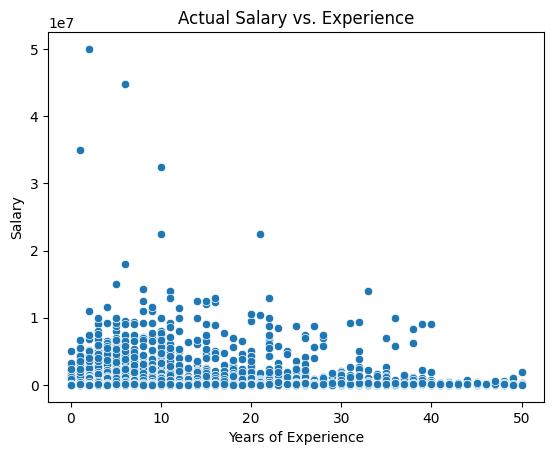

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df["YearsCodePro"], y=df["ConvertedCompYearly"])
plt.title("Actual Salary vs. Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()


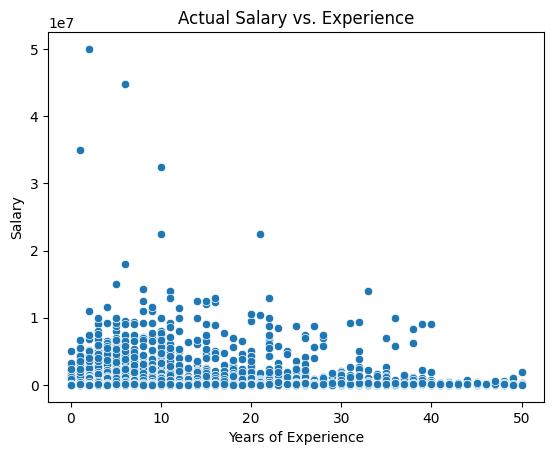

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df["YearsCodePro"], y=df["ConvertedCompYearly"])
plt.title("Actual Salary vs. Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()


In [148]:
salary = np.expm1(model.predict([X]))  # exp(salary) - 1


c:\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: Found array with dim 3. RandomForestRegressor expected <= 2.

In [150]:
le_country = joblib.load("../app/le_country.pkl")
le_edlevel = joblib.load("../app/le_edlevel.pkl")
le_role = joblib.load("../app/le_role.pkl")

X = np.array([[
    le_country.transform([country])[0],
    le_edlevel.transform([edlevel])[0],
    years_experience,
    le_role.transform([role])[0]
]])


NameError: name 'country' is not defined

In [151]:
salary = model.predict(X)[0]
